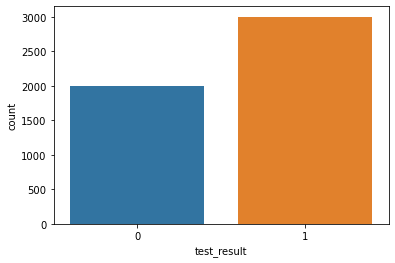

In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
df= pd.read_csv('hearing_test.csv')
# df
df['test_result'].value_counts()
sns.countplot(data=df, x=df['test_result']);

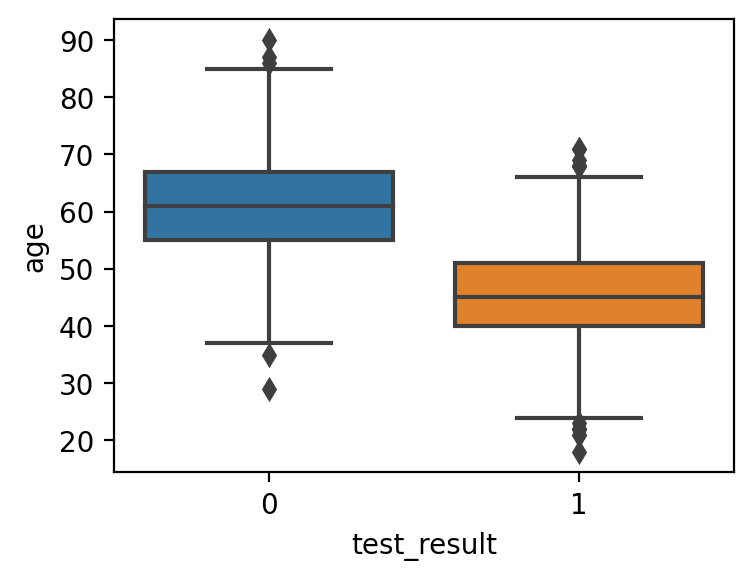

In [17]:
plt.figure(figsize=(4,3),dpi=200);
sns.boxplot(x='test_result',y='age',data=df );

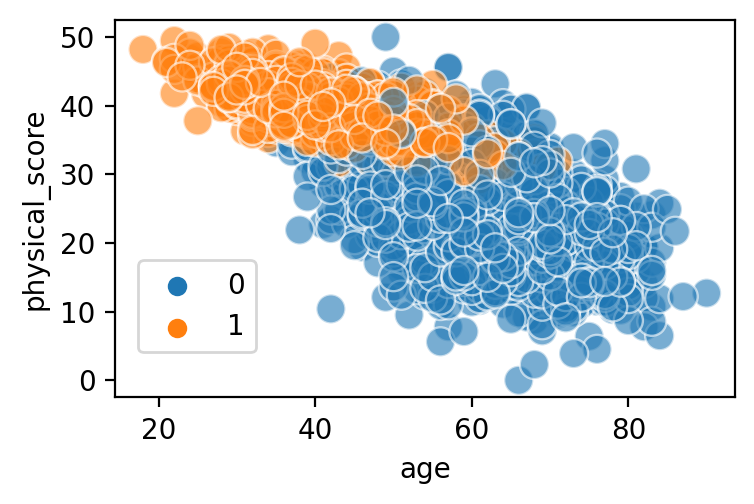

In [48]:
plt.figure(figsize=(4,2.5),dpi=200);
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result', alpha= 0.6,s=110 );
plt.legend(bbox_to_anchor=(.25,.4));

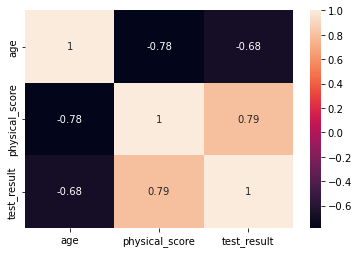

In [50]:
sns.heatmap(df.corr(),annot= True);

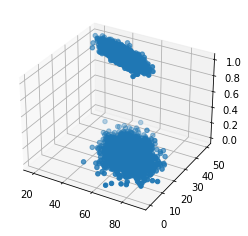

In [53]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'],df['physical_score'],df['test_result']);

In [62]:
X =df.drop('test_result',axis=1)
y=df['test_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_test_pred = log_model.predict(X_test)
accuracy_score(y_test,y_test_pred)
# ,confusion_matrix,classification_report

0.9206666666666666

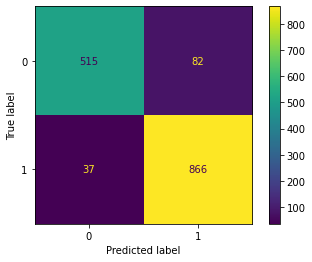

In [67]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(log_model,X_test,y_test);

In [68]:
len(y_test)

1500

In [69]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [70]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_test_pred)
recall_score(y_test,y_test_pred)

0.9590254706533776

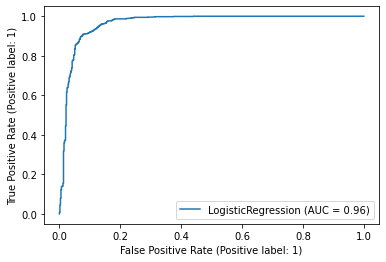

In [71]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_roc_curve(log_model,X_test,y_test);

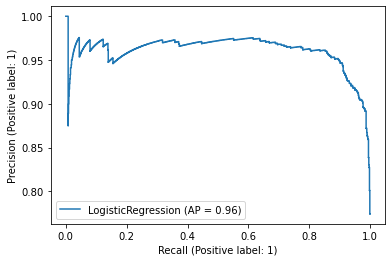

In [72]:
plot_precision_recall_curve(log_model,X_test,y_test);